### KDD CUP 2012 Data Science Machine Learning final project
Search advertising has been one of the major revenue sources of the Internet industry for years. A key technology behind search advertising is to predict the click.

* Click - did the user click 
* DisplayURL - ad url (encoded as huge integer) 
* AdId - identiﬁer of speciﬁc ad (integer) 
* AdvertiserId - identiﬁer of speciﬁc advertiser (integer) 
* Depth - number of ads displayed in a session (1-3) 
* Position - position of ad in the list of displayed ads 
* Gender - 1,2 = male/female, 0 = unknown 
* Age - discretized into 6 intervals 

Text variables: 
* AdKeyword tokens - keywords for an ad 
* AdTitle tokens - title of an ad 
* AdDescription tokens - description of an add 
* Query tokens - user query 

All text variables: list of words separated by | ,each word replaced by an integer for anonymity.
### Prepared by:
  #### Govinda Bhandari
  #### Yiming Liu
  #### Zviad Gvilava

### Project Objective
* Step 1 - Import the library
* Step 2 - Setting up the Data
* Step 3 - Exploratory Data Analysis
* Step 4 - Handling Tokens (Text Data)
* Step 5 - Spliting Data into Training and Testing 
* Step 6 - Creating features using Correaltion
* Step 7 - Handling Imbalance Data
* Step 8 - Training the model
* Step 9 - Model Validation
* Step 10 - Creating Classification Report and Confusion Matrix
* Step 11 - Comparision of different Model performance


## Step 1: Importing Libraries

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


## Step 2: Setting up the Data
### Mounting Drive

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
fname = "./gdrive/MyDrive/Copy of KDD_train.csv"
import pandas as pd
data = pd.read_csv(fname)
data.shape

(4000000, 13)

In [6]:
data.head()

,ID,Click,DisplayURL,AdId,AdvertiserId,Depth,Position,Gender,Age,AdKeyword_tokens,AdTitle_tokens,AdDescription_tokens,Query_tokens
0,3585022,1,5079901068051390251,4261847,25928,2,2,2,6,53|225|6,53|225|6|739|1590|221|394,176|881|3|53|225|6|1|739|1590|221|394|3,225|105|6
1,3072980,0,12575528779388759460,3112706,23778,2,1,2,3,3624|395,3683|1683|3155,3683|1683|3155|1|2367|69|1683|3803|728|8484|26...,395|3051|1990
2,1385459,0,2412771796110463309,20067154,23781,3,3,1,2,1545|75|31,35|2233|1545|75|31|172|46|467|170|2233|58052|1...,172|46|467|170|5634|5112|40|155|1965|834|21|41...,1545|75|31
3,1241189,0,14340390157469404125,10110402,23808,1,1,2,4,366|270,69|366|270|1|37|1270|1|466|164|616,1671|771|111|187|1|1170|33|2357|119|1|16457|99...,366|0|270|17
4,2949285,0,9573487645018952575,1918047,1339,2,2,2,3,2219|2323|600,2219|2323|600|0|11|207|3073|2680|3,36|2219|2323|600|1|37|1460|872|6|3|169|207|130...,2219|30|600|6


## Step 3:  Exploratory Data Analysis (EDA)
In this section we will check if the data is null, mean value of each column (independent variable) for dependent variable. 

In [7]:
data.isnull().sum()

ID                      0
Click                   0
DisplayURL              0
AdId                    0
AdvertiserId            0
Depth                   0
Position                0
Gender                  0
Age                     0
AdKeyword_tokens        0
AdTitle_tokens          0
AdDescription_tokens    0
Query_tokens            0
dtype: int64

There is no null value in our data.

In [8]:
data.nunique()

ID                      4000000
Click                         2
DisplayURL                20694
AdId                     201256
AdvertiserId              13853
Depth                         3
Position                      3
Gender                        3
Age                           6
AdKeyword_tokens         255534
AdTitle_tokens           571766
AdDescription_tokens     460177
Query_tokens            1162999
dtype: int64

Click mean by  Age
1    0.046495
2    0.046957
3    0.045845
4    0.044524
5    0.050272
6    0.055787
Name: Click, dtype: float64


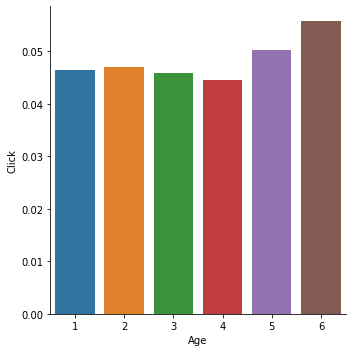

In [9]:
sns.catplot(x="Age", y="Click", kind="bar", data=data, n_boot=1)
print('Click mean by ',data.groupby('Age').Click.mean())

In the above bar graph we can see the Age 6 group has higher click mean following by age 5.

Click mean by  Position
1    0.058184
2    0.032100
3    0.020342
Name: Click, dtype: float64


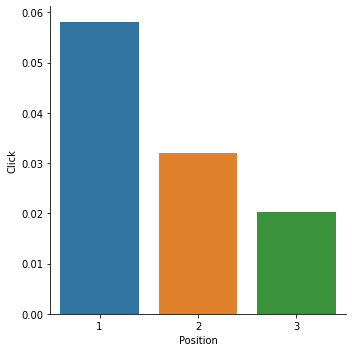

In [10]:
sns.catplot(x="Position", y="Click", kind="bar", data=data, n_boot=1)
print('Click mean by ',data.groupby('Position').Click.mean())

Ads Placed in first position have higher click mean.

Click mean by  Depth
1    0.048027
2    0.050208
3    0.038040
Name: Click, dtype: float64


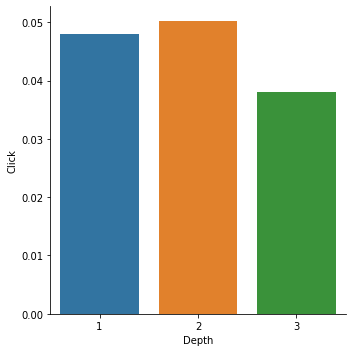

In [11]:
sns.catplot(x="Depth", y="Click", kind="bar", data=data, n_boot=1)
print('Click mean by ',data.groupby('Depth').Click.mean())

In [ ]:
Between the all 3 depth group 2 depth group Ads were most clicked.

In [12]:
data["DisplayURL"].value_counts()

14340390157469404125    430788
12057878999086460853    358952
7903914528320191889     120983
4298118681424644510      39799
14531867648059391627     38989
                         ...  
12975157906362870694         1
7605231903774043921          1
10314096963084194171         1
8123642386187004921          1
11779507049523109164         1
Name: DisplayURL, Length: 20694, dtype: int64

## Step 4: Handiling Tokens (Text Data)
Why handling token and using as a feature is important for us?
The token data express the ads title and description which is relevent to the different customer intrest. For example, if I will see Ads title and description which is similar to my intrest those ads are likely to click then other ads which title and description is not similar to my intrest.

In [13]:
data[['AdTitle_tokens','AdDescription_tokens']].dtypes

AdTitle_tokens          object
AdDescription_tokens    object
dtype: object

Function to split data by '|' and join theam as string

In [ ]:
# def string_split(label):
#    result = [''.join(str(i).split('|')) for i in label ]
#    return result

Using functions for columns to split data

In [ ]:
# AdKeywords = string_split(data['AdKeyword_tokens'])
# AdTitle = string_split(data['AdTitle_tokens'])
# Adkeyword_tokens = string_split(data['AdKeyword_tokens'])
# Ad_Description = string_split(data['AdDescription_tokens'])
# Ad_Query = string_split(data['Query_tokens'])

In [ ]:
# data.columns

####Spliting Tokens and converting to the numeric form by applying count of string

In [14]:
def count(sentence):
    '''
        (str) -> (int)
        Returns no. of words in a sentence.
    '''
    return len(str(sentence).split('|'))

#### Adding new column of text count to dataframe
Applying count will help to divide tokens into splitted array and counting each array will be placed as numeric form so that we can analyse which tokens count got more ads clicked.

In [15]:
data['ATcount'] = data['AdTitle_tokens'].apply(count)
data['AKcount'] = data['AdKeyword_tokens'].apply(count)
data['ADcount'] = data['AdDescription_tokens'].apply(count)
data['AQcount'] = data['Query_tokens'].apply(count)


In [16]:
data.head(5)

,ID,Click,DisplayURL,AdId,AdvertiserId,Depth,Position,Gender,Age,AdKeyword_tokens,AdTitle_tokens,AdDescription_tokens,Query_tokens,ATcount,AKcount,ADcount,AQcount
0,3585022,1,5079901068051390251,4261847,25928,2,2,2,6,53|225|6,53|225|6|739|1590|221|394,176|881|3|53|225|6|1|739|1590|221|394|3,225|105|6,7,3,12,3
1,3072980,0,12575528779388759460,3112706,23778,2,1,2,3,3624|395,3683|1683|3155,3683|1683|3155|1|2367|69|1683|3803|728|8484|26...,395|3051|1990,3,2,25,3
2,1385459,0,2412771796110463309,20067154,23781,3,3,1,2,1545|75|31,35|2233|1545|75|31|172|46|467|170|2233|58052|1...,172|46|467|170|5634|5112|40|155|1965|834|21|41...,1545|75|31,15,3,28,3
3,1241189,0,14340390157469404125,10110402,23808,1,1,2,4,366|270,69|366|270|1|37|1270|1|466|164|616,1671|771|111|187|1|1170|33|2357|119|1|16457|99...,366|0|270|17,10,2,23,4
4,2949285,0,9573487645018952575,1918047,1339,2,2,2,3,2219|2323|600,2219|2323|600|0|11|207|3073|2680|3,36|2219|2323|600|1|37|1460|872|6|3|169|207|130...,2219|30|600|6,9,3,20,4


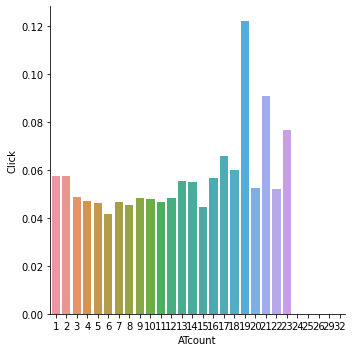

In [17]:
sns.catplot(x="ATcount", y="Click", kind="bar", data=data, n_boot=1)


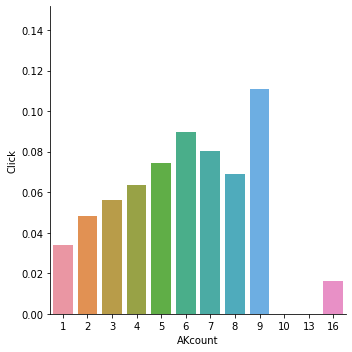

In [18]:
sns.catplot(x="AKcount", y="Click", kind="bar", data=data, n_boot=1)

##Step 5 - Spliting Data into Training and Testing

In [19]:
y = data['Click']
X = data.drop(columns = ['Click','AdKeyword_tokens','AdTitle_tokens','AdDescription_tokens','Query_tokens'])

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

## Step 6 - Feature selection using Correaltion
Checking the Pearson correlation is important step for us to find the feature so that our data will be not overfitted. Having correlation with same column will help us to choose one of them as our feature by removing one. We have constructed functions which will give us correlated data then we will apply to remove those correlated data in our Train and Test set. 

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

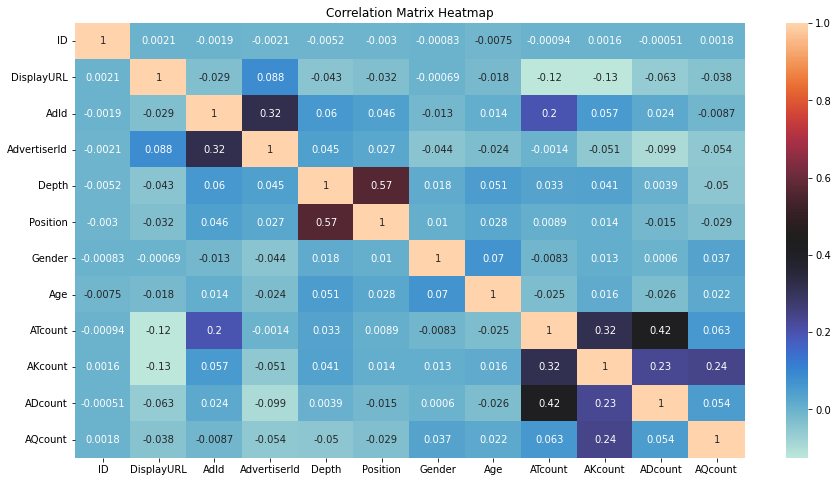

In [21]:
# Using pearson coefficient
corrMatrix = X_train.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corrMatrix,annot = True,cmap = 'icefire').set_title('Correlation Matrix Heatmap')

In [22]:
# with the following function we can select highly correlated feature
# it will remove the first feature that is correlated with any other feature
def correlation(dataset,threshold):
  col_corr = set() #set of all the names correlated columns 
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold: # checking for absolute coefficient value
          colname = corr_matrix.columns[i] # fetching the name of column
          col_corr.add(colname)
  return col_corr

In [23]:
corr_features = correlation(X_train,0.2) # Choosed threshold as 0.2 becasue our correlation coefficient correlated mostly from 0.2 
len(set(corr_features))

5

In [24]:
corr_features # features with high correlation and correlated to other feature

{'ADcount', 'AKcount', 'AQcount', 'AdvertiserId', 'Position'}

In [25]:
X_train.drop(corr_features,axis=1) # dropping correlated feature from training and testing data to avoid noise
X_test.drop(corr_features,axis=1)

,ID,DisplayURL,AdId,Depth,Gender,Age,ATcount
814683,4727342,13653454917467024944,4330042,2,1,4,10
1357371,890667,11309025704045849703,22103473,2,2,4,10
2106112,2418235,2002143058964984831,21364448,3,2,4,12
3483684,5344650,5851252814446935968,21478259,2,1,6,12
3960754,5752004,6263749423537724136,21373400,1,2,3,9
...,...,...,...,...,...,...,...
121113,4549983,16100818328677732039,21449592,3,1,1,13
1516674,2905786,6715049002232655961,3065545,1,1,2,6
3550514,1729226,8848021695083076346,20046558,2,1,4,11
2754091,502036,16458916817525931292,6815904,3,1,4,7


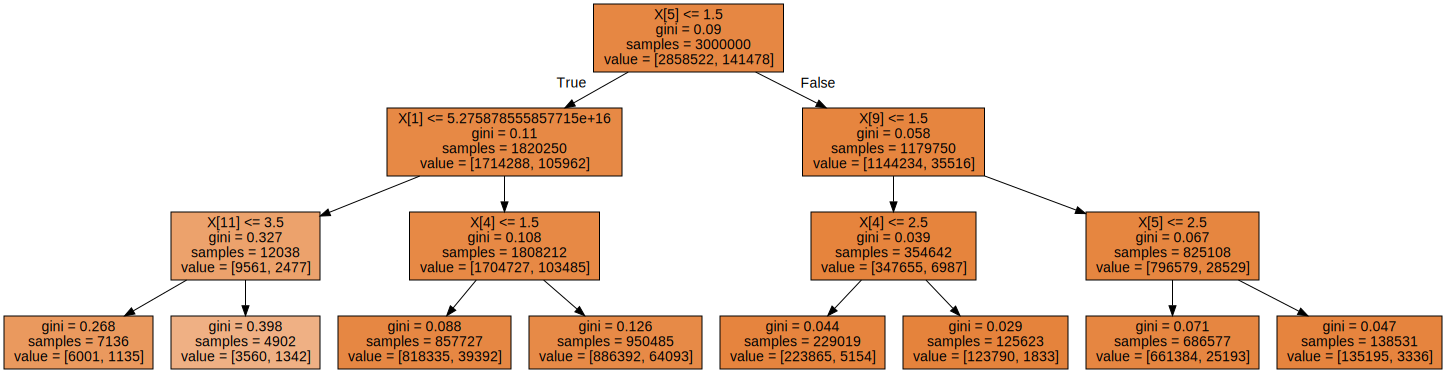

In [26]:
#Decesion Tree Classifier
kdd_tree = DecisionTreeClassifier(max_depth=3, random_state=5)
kdd_tree.fit(X_train,y_train)
tree_graph = tree.export_graphviz(kdd_tree, out_file=None, filled=True)
graph = graphviz.Source(tree_graph, format="png") 
graph

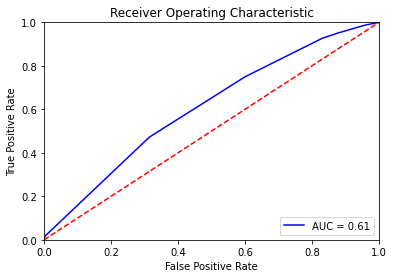

In [27]:
# calculate the fpr and tpr for all thresholds of the classification
import sklearn.metrics as metrics
probs = kdd_tree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After uding feature selection method and by using also tokens as feature, we have got AUC score 0.61. We want to expand our AUC score by using oversampling and scaling method.

## Step 7: Handling Imbalance Data using Synthetic Minority Oversampling Technique

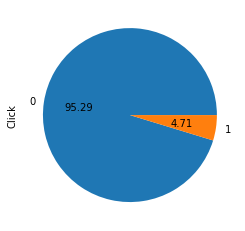

In [31]:
y.value_counts().plot.pie(autopct='%.2f') # checking the data percentage of click we got over 95% not clicked (0) value  and over 4.5% clicked(1) value

Our Dataset is imbalance. The count of 0 is higher by huge margin and the count of 1 is very low so we cannot apply undersampling technique. In this case we will apply oversampling technique.

In [30]:
from imblearn.over_sampling import SMOTE
sc = SMOTE()
X_resample, y_resample = sc.fit_resample(X,y)

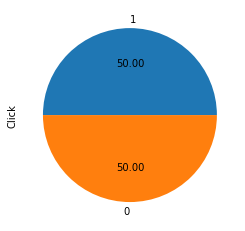

In [ ]:
y_resample.value_counts().plot.pie(autopct='%.2f')

Splitting training and testing data after oversampling

In [32]:
train_X, test_X, train_y, test_y = train_test_split(X_resample, y_resample, random_state=1)

## Step 8 - Training the model

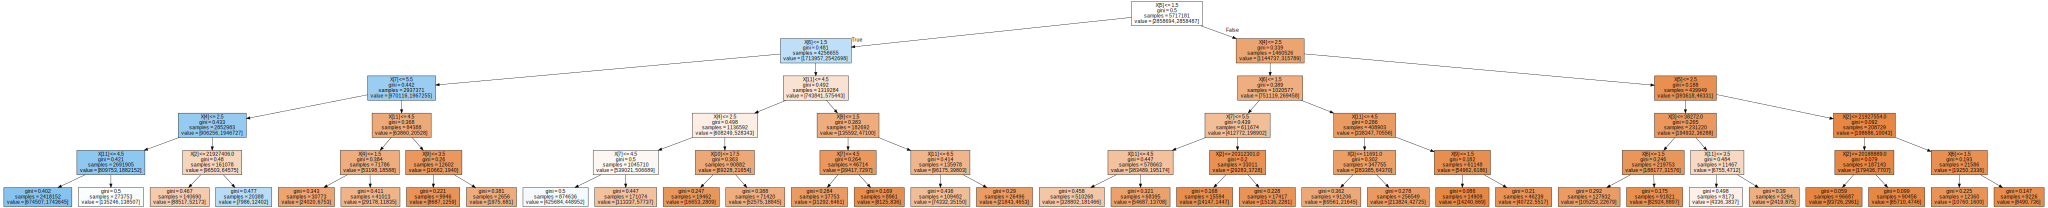

In [33]:
#Decesion Tree Classifier
kdd_tree = DecisionTreeClassifier(max_depth=5, random_state=5)
kdd_tree.fit(train_X,train_y)
tree_graph = tree.export_graphviz(kdd_tree, out_file=None, filled=True)
graph = graphviz.Source(tree_graph, format="png") 
graph

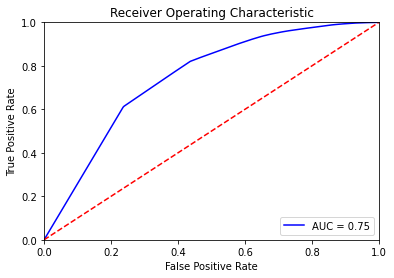

In [35]:
import sklearn.metrics as metrics
probs = kdd_tree.predict_proba(test_X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Step 9 - Model Validation
Applying CrossValidation Method to evaluate the model performance

In [ ]:
y_prediction = kdd_tree.predict(test_X)
print(f'Predicted:  {y_prediction}')
tree_score = accuracy_score(test_y,y_prediction)
rkf = RepeatedKFold(n_splits= 5, n_repeats=10, random_state=10)
tree_CV_Score = cross_val_score(kdd_tree,train_X,train_y,cv=rkf,scoring = 'roc_auc').mean()
print(f'Model accuracy : {tree_score}')
print(f'Model Score roc auc mean : {tree_CV_Score}')

Predicted:  [1 1 1 ... 1 1 1]
Model accuracy : 0.6917071542776064
Model Score roc auc mean : 0.7458188291176806


In [ ]:
compare_y = pd.DataFrame({'Actual value(test_y)': test_y, 'Predicted value(y_pred)':y_prediction})
compare_y

,Actual value(test_y),Predicted value(y_pred)
6265144,1,1
5024381,1,1
572881,0,1
6347968,1,1
7368129,1,0
...,...,...
5056666,1,1
5657575,1,1
5894450,1,1
2388083,0,1


## Step 10 - Creating Classification Report and Confusion Matrix

              precision    recall  f1-score   support

           0       0.76      0.56      0.65    952760
           1       0.65      0.82      0.73    952967

    accuracy                           0.69   1905727
   macro avg       0.71      0.69      0.69   1905727
weighted avg       0.71      0.69      0.69   1905727



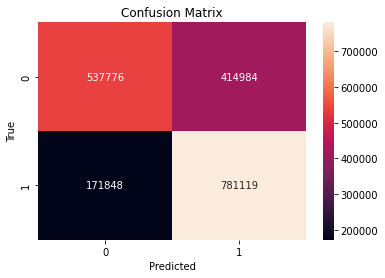

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(test_y,y_prediction)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(test_y,y_prediction))

In [ ]:
# Creating Scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(train_X, train_y)

# transform validation set
X_valid_scaled = scaler.transform(test_X)

In [ ]:
# # function to train a given model, generate predictions, and return accuracy score
# from sklearn.metrics import accuracy_score
# def fit_evaluate_model(model, X_train, y_train, X_test, Y_test):
#     model.fit(X_train, y_train)
#     y_predicted = model.predict(X_test)
#     return accuracy_score(y_test, y_prediction)

In [ ]:
# Knn classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, train_y)
y_predicted = knn_classifier.predict(X_valid_scaled)
knn_accuracy = accuracy_score(test_y,y_predicted)
print('Knn_accuracy: ', knn_accuracy)

Knn_accuracy:  0.8174680843583577


In [ ]:
compare_y = pd.DataFrame({'Actual value(test_y)': test_y, 'Predicted value(y_pred)':y_predicted})
compare_y

,Actual value(test_y),Predicted value(y_pred)
6265144,1,1
5024381,1,1
572881,0,0
6347968,1,1
7368129,1,1
...,...,...
5056666,1,1
5657575,1,1
5894450,1,1
2388083,0,0


              precision    recall  f1-score   support

           0       0.87      0.75      0.80    952760
           1       0.78      0.88      0.83    952967

    accuracy                           0.82   1905727
   macro avg       0.82      0.82      0.82   1905727
weighted avg       0.82      0.82      0.82   1905727



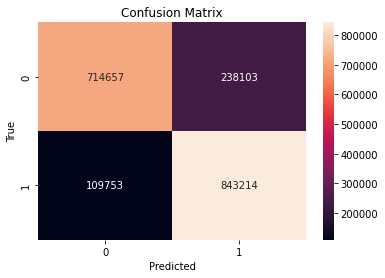

In [ ]:
# Confusion Matrix forKNN Classifier
matrix = confusion_matrix(test_y,y_predicted)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(test_y,y_predicted))

After applying oversampling and standard scaling methods our accuracy KNN model confusion metrics is 0.82 

Text(0.5, 1.0, 'Accuracy Score of Different Models')

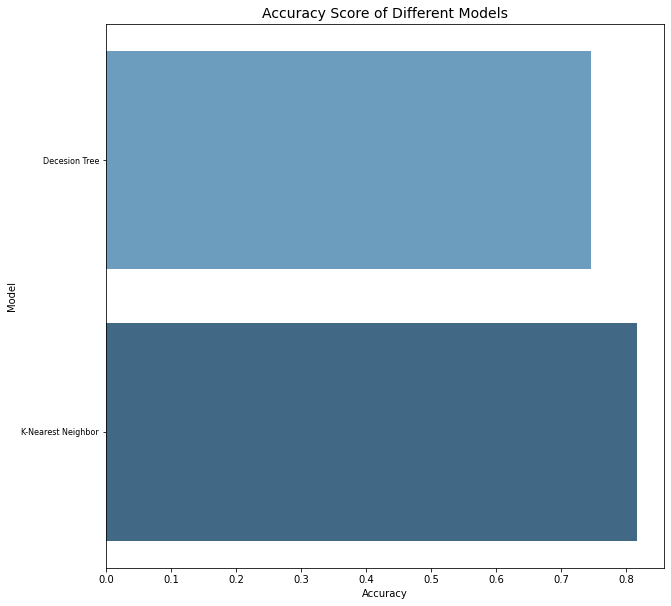

In [ ]:
      # create dataframe of accuracy and model and sort values
performance_comparison = pd.DataFrame({"Model": ["Decesion Tree","K-Nearest Neighbor"],
                                       "Accuracy": [tree_score,knn_accuracy]})

performance_comparison = performance_comparison.sort_values(by="Accuracy", ascending=True)

# set the plot
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=performance_comparison, palette="Blues_d",label = "Accuracy")

# set title arrange labels
plt.yticks(size = 8)
plt.xticks(size = 10)
plt.title("Accuracy Score of Different Models", size=14)

## Roc Auc for KNN model

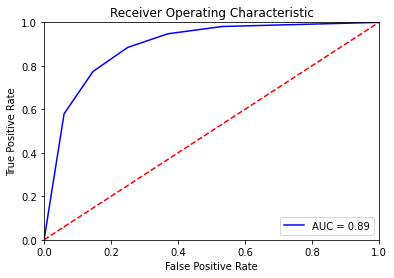

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
import sklearn.metrics as metrics
probs = knn_classifier.predict_proba(X_valid_scaled)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Step 11. Model Comparison

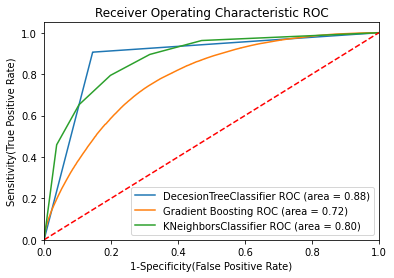

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

plt.figure()

# Adding the models to the list that we want to view on the ROC plot
models = [
{
    'label': 'DecesionTreeClassifier',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'KNeighborsClassifier',
    'model': KNeighborsClassifier(),
},

]

# for loop  toiterates through our models
for m in models:
    model = m['model'] # select the model
    model.fit(train_X, train_y) # train the model
    y_pred=model.predict(test_X) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(test_y, model.predict_proba(test_X)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(test_y,model.predict(test_X))
# plotiing the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic ROC')
plt.legend(loc="lower right")
plt.show()  

In [ ]:
At the end we have compared the different model ROC score to compare which perform bettter.